In [592]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from subprocess import check_output
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
from datetime import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [593]:
warnings.filterwarnings('ignore')

In [594]:
data = pd.read_csv("/content/data.csv")
data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,7380500
1,1/4/2012,331.27,333.87,329.08,666.45,5749400
2,1/5/2012,329.83,330.75,326.89,657.21,6590300
3,1/6/2012,328.34,328.77,323.68,648.24,5405900
4,1/9/2012,322.04,322.29,309.46,620.76,11688800


In [595]:
data.drop(['Date'], axis=1, inplace=True)

In [596]:
print(data.head())
print(data.shape)
print(data.columns)

     Open    High     Low   Close    Volume
0  325.25  332.83  324.97  663.59   7380500
1  331.27  333.87  329.08  666.45   5749400
2  329.83  330.75  326.89  657.21   6590300
3  328.34  328.77  323.68  648.24   5405900
4  322.04  322.29  309.46  620.76  11688800
(1278, 5)
Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')


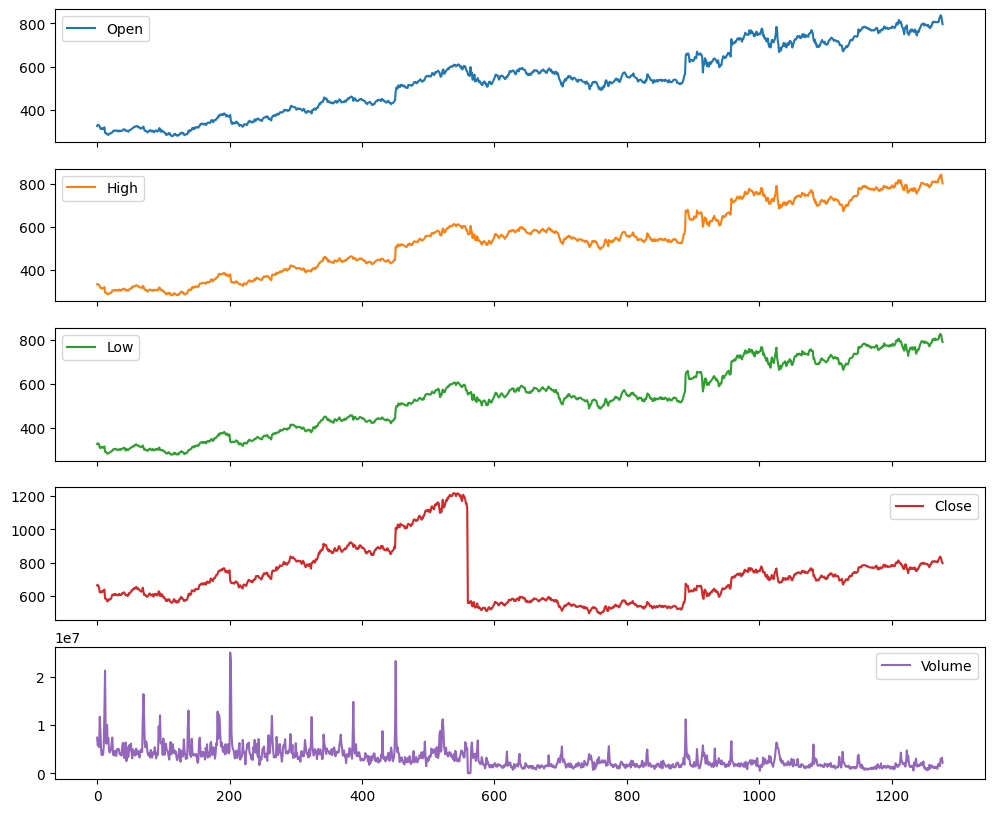

Open      1235
High      1239
Low       1243
Close     1258
Volume    1259
dtype: int64

In [597]:
data.plot(legend=True,subplots=True, figsize = (12, 10))
plt.show()
#data['Close'].plot(legend=True, figsize = (12, 6))
#plt.show()
#data['Volume'].plot(legend=True,figsize=(12,7))
#plt.show()

data.shape
data.size
data.describe(include='all').T
data.dtypes
data.nunique()


In [598]:
data.reset_index(drop=True, inplace=True)
#data.fillna(data.mean(), inplace=True)
data.head()


,Open,High,Low,Close,Volume
0,325.25,332.83,324.97,663.59,7380500
1,331.27,333.87,329.08,666.45,5749400
2,329.83,330.75,326.89,657.21,6590300
3,328.34,328.77,323.68,648.24,5405900
4,322.04,322.29,309.46,620.76,11688800


        Open    High     Low   Close    Volume
0     325.25  332.83  324.97  663.59   7380500
1     331.27  333.87  329.08  666.45   5749400
2     329.83  330.75  326.89  657.21   6590300
3     328.34  328.77  323.68  648.24   5405900
4     322.04  322.29  309.46  620.76  11688800
...      ...     ...     ...     ...       ...
1273  829.62  835.77  825.06  835.67   1494500
1274  837.81  838.00  827.01  832.15   2973900
1275  834.71  841.95  820.44  823.31   2965800
1276  814.66  815.84  799.80  802.32   3246600
1277  796.86  801.25  790.52  796.79   2160600

[1278 rows x 5 columns]


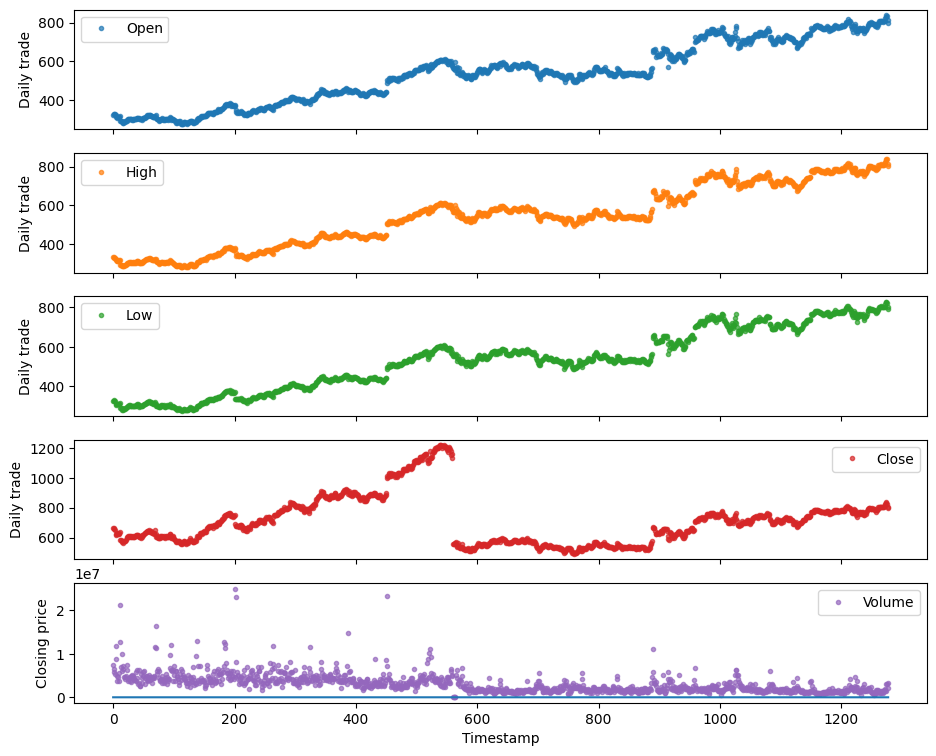

In [599]:

data.nunique()

data.sort_index(axis=1,ascending=True)

cols_plot = ['Open', 'High', 'Low','Close','Volume']
axes = data[cols_plot].plot(marker='.', alpha=0.7, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)



In [600]:
data.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

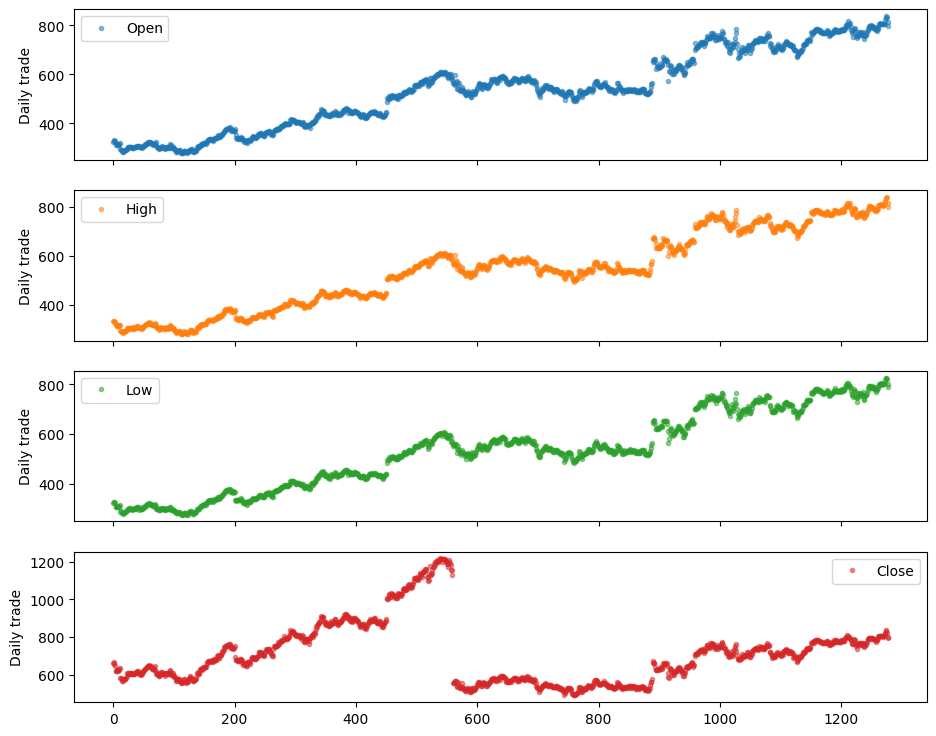

In [601]:
cols_plot = ['Open', 'High', 'Low','Close']
axes = data[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

        Open    High     Low   Close    Volume
0     325.25  332.83  324.97  663.59   7380500
1     331.27  333.87  329.08  666.45   5749400
2     329.83  330.75  326.89  657.21   6590300
3     328.34  328.77  323.68  648.24   5405900
4     322.04  322.29  309.46  620.76  11688800
...      ...     ...     ...     ...       ...
1273  829.62  835.77  825.06  835.67   1494500
1274  837.81  838.00  827.01  832.15   2973900
1275  834.71  841.95  820.44  823.31   2965800
1276  814.66  815.84  799.80  802.32   3246600
1277  796.86  801.25  790.52  796.79   2160600

[1278 rows x 5 columns]


,count,mean,std,min,25%,50%,75%,max
Open,1278.0,5.379949e+02,1.545084e+02,279.12,4.060375e+02,538.395,6.688625e+02,837.81
High,1278.0,5.421689e+02,1.555825e+02,281.21,4.082300e+02,542.330,6.777050e+02,841.95
Low,1278.0,5.332788e+02,1.531740e+02,277.22,4.033350e+02,534.355,6.621900e+02,827.01
Close,1278.0,7.141601e+02,1.638924e+02,491.20,5.784125e+02,698.150,7.855725e+02,1216.83
Volume,1278.0,3.134661e+06,2.265015e+06,7900.00,1.608700e+06,2528700.000,4.106200e+06,24977900.00


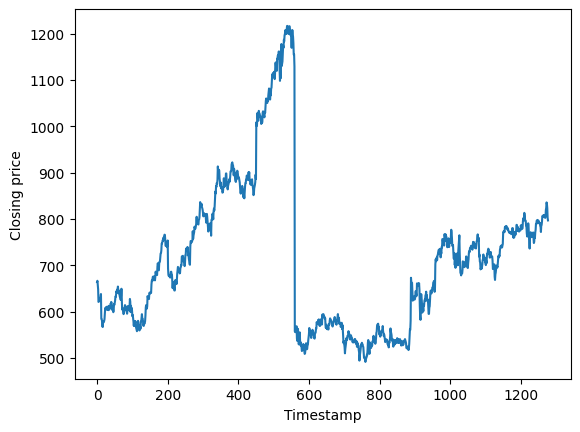

In [602]:
plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)

df.describe().transpose()

In [603]:
from sklearn.model_selection import train_test_split

X = []
Y = []
window_size=100
for i in range(1 , len(df) - window_size -1 , 1):
    first = df.iloc[i,2]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df.iloc[i + j, 2] - first) / first)
    temp2.append((df.iloc[i + window_size, 2] - first) / first)
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))

940
236


In [604]:
import keras
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten

#LSTM Model

lstm_1 = keras.layers.LSTM(16, activation='tanh', return_sequences=True, input_shape=(train_X.shape[1],100 ))

# Create the second LSTM layer
lstm_2 = keras.layers.LSTM(32, activation='tanh')


# Create the output layer
dense_layer = keras.layers.Dense(64, activation='relu')

# Stack the LSTM layers
model = keras.Sequential([lstm_1, lstm_2, dense_layer])



#DNN Model
model.add(Dense(64))
model.add(Activation('relu'))

###2nd layer
model.add(Dense(64))
model.add(Activation('relu'))

###3rd layer
model.add(Dense(64))
model.add(Activation('relu'))


model.add(Flatten())
#Final layers
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])
history = model.fit(train_X, train_Y, validation_data=(test_X,test_Y), epochs=100,batch_size=64, verbose=1, shuffle =False)

Epoch 1/100
15/15 [==============================] - 3s 46ms/step - loss: 0.0133 - mse: 0.0133 - mae: 0.0905 - val_loss: 0.0090 - val_mse: 0.0090 - val_mae: 0.0755
Epoch 2/100
15/15 [==============================] - 0s 5ms/step - loss: 0.0065 - mse: 0.0065 - mae: 0.0647 - val_loss: 0.0049 - val_mse: 0.0049 - val_mae: 0.0542
Epoch 3/100
15/15 [==============================] - 0s 4ms/step - loss: 0.0040 - mse: 0.0040 - mae: 0.0505 - val_loss: 0.0037 - val_mse: 0.0037 - val_mae: 0.0497
Epoch 4/100
15/15 [==============================] - 0s 5ms/step - loss: 0.0025 - mse: 0.0025 - mae: 0.0396 - val_loss: 0.0025 - val_mse: 0.0025 - val_mae: 0.0373
Epoch 5/100
15/15 [==============================] - 0s 4ms/step - loss: 0.0017 - mse: 0.0017 - mae: 0.0319 - val_loss: 0.0019 - val_mse: 0.0019 - val_mae: 0.0329
Epoch 6/100
15/15 [==============================] - 0s 5ms/step - loss: 0.0013 - mse: 0.0013 - mae: 0.0267 - val_loss: 0.0017 - val_mse: 0.0017 - val_mae: 0.0314
Epoch 7/100
15/15 [==

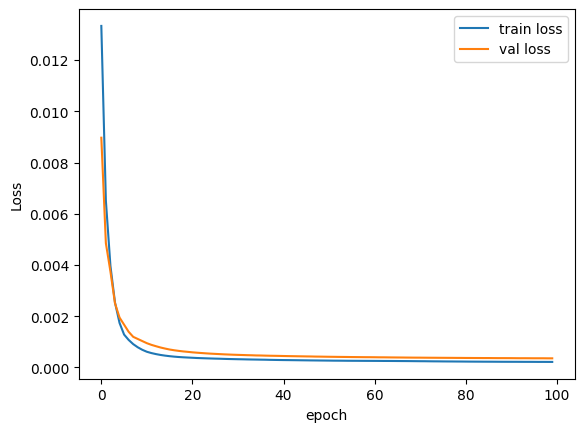

In [605]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

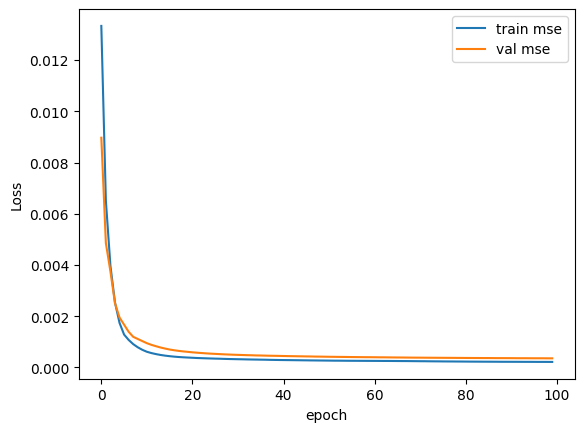

In [606]:
plt.plot(history.history['mse'], label='train mse')
plt.plot(history.history['val_mse'], label='val mse')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

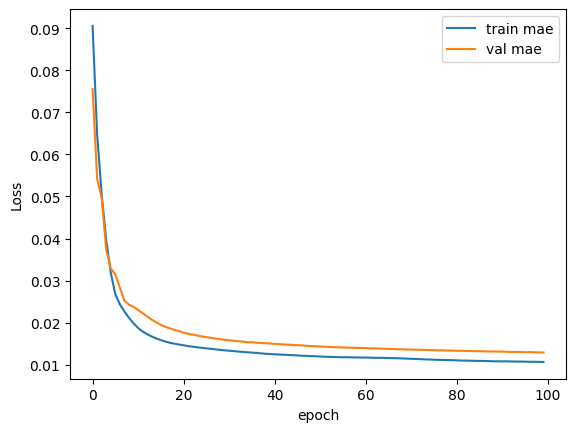

In [607]:
plt.plot(history.history['mae'], label='train mae')
plt.plot(history.history['val_mae'], label='val mae')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_44 (LSTM)              (None, 1, 16)             7488      
                                                                 
 lstm_45 (LSTM)              (None, 32)                6272      
                                                                 
 dense_110 (Dense)           (None, 64)                2112      
                                                                 
 dense_111 (Dense)           (None, 64)                4160      
                                                                 
 activation_66 (Activation)  (None, 64)                0         
                                                                 
 dense_112 (Dense)           (None, 64)                4160      
                                                                 
 activation_67 (Activation)  (None, 64)              

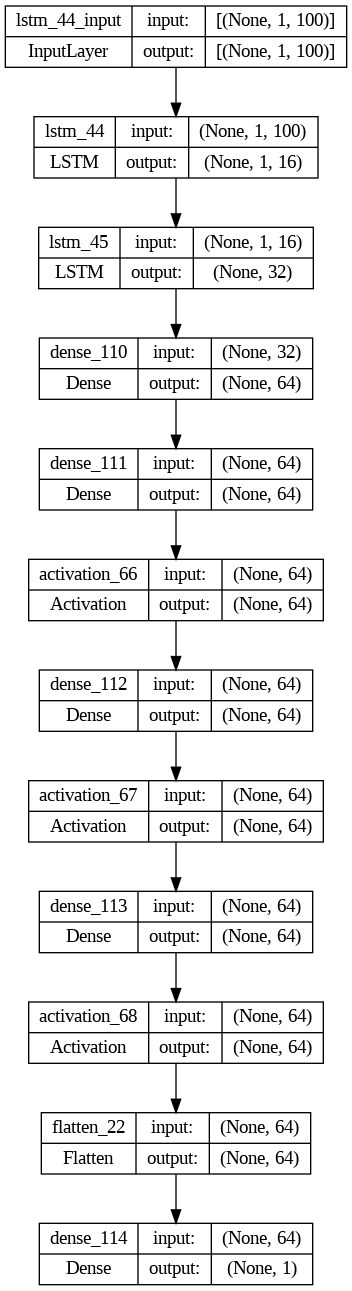

In [608]:
# After the model has been constructed, we'll summarise it
from tensorflow.keras.utils import plot_model
print(model.summary())
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

The Value used in Table for performance is from here

In [609]:
model.evaluate(test_X, test_Y)

8/8 [==============================] - 0s 2ms/step - loss: 3.5635e-04 - mse: 3.5635e-04 - mae: 0.0129


[0.0003563523932825774, 0.0003563523932825774, 0.012928732670843601]

In [610]:
from sklearn.metrics import explained_variance_score, mean_poisson_deviance, mean_gamma_deviance
from sklearn.metrics import r2_score
from sklearn.metrics import max_error

# predict probabilities for test set
yhat_probs = model.predict(test_X, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

var = explained_variance_score(test_Y.reshape(-1,1), yhat_probs)
print('Variance: %f' % var)

r2 = r2_score(test_Y.reshape(-1,1), yhat_probs)
print('R2 Score: %f' % r2)

var2 = max_error(test_Y.reshape(-1,1), yhat_probs)
print('Max Error: %f' % var2)

Variance: 0.974307
R2 Score: 0.974231
Max Error: 0.154305


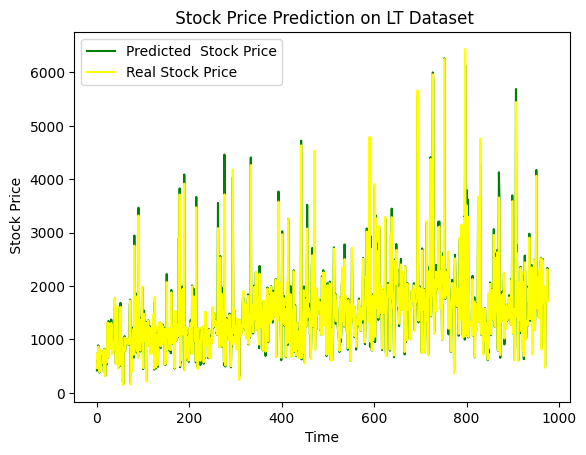

In [611]:
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'yellow', label = 'Real Stock Price')
plt.title(' Stock Price Prediction on LT Dataset')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

In [612]:
predicted

array([[ 418.0153 ],
       [ 741.8454 ],
       [ 616.9488 ],
       [ 888.6964 ],
       [ 723.49225],
       [ 378.49622],
       [ 434.82544],
       [ 729.9967 ],
       [ 786.0314 ],
       [ 719.54626],
       [ 757.026  ],
       [ 743.49054],
       [ 725.08997],
       [ 517.78796],
       [ 786.80206],
       [ 396.69168],
       [ 824.4955 ],
       [ 748.83795],
       [ 315.53003],
       [ 765.58966],
       [ 760.29535],
       [ 532.98755],
       [ 694.1353 ],
       [1301.94   ],
       [ 656.5856 ],
       [1346.158  ],
       [ 864.562  ],
       [1041.8594 ],
       [ 935.77905],
       [ 835.1742 ],
       [ 956.92163],
       [1372.2301 ],
       [1238.9469 ],
       [ 753.17065],
       [ 908.26447],
       [ 853.7616 ],
       [ 800.8925 ],
       [ 803.4802 ],
       [1185.5107 ],
       [1763.4458 ],
       [ 865.0008 ],
       [ 541.04224],
       [1064.868  ],
       [ 859.6409 ],
       [1595.1632 ],
       [1178.6366 ],
       [ 460.3194 ],
       [ 600.

In [613]:
test_label

array([[ 460.96164782],
       [ 742.88645756],
       [ 625.95521503],
       [ 868.78183062],
       [ 726.74392624],
       [ 387.84161058],
       [ 411.87235513],
       [ 723.4858742 ],
       [ 801.78320611],
       [ 725.40384727],
       [ 764.49176258],
       [ 742.76087835],
       [ 735.62003124],
       [ 556.13192666],
       [ 790.87616027],
       [ 394.68217718],
       [ 815.18326063],
       [ 738.79172853],
       [ 310.37396362],
       [ 783.15250167],
       [ 764.23097991],
       [ 558.93206951],
       [ 678.69004621],
       [1313.73574255],
       [ 661.39585686],
       [1309.88982162],
       [ 868.59424249],
       [1042.30680132],
       [ 938.07771498],
       [ 831.99494003],
       [ 955.59849547],
       [1308.91291122],
       [1255.00274574],
       [ 724.92886226],
       [ 951.96046512],
       [ 853.62585898],
       [ 793.98409627],
       [ 799.94147247],
       [1188.3759349 ],
       [1779.02027833],
       [ 870.38014784],
       [ 534.526

In [614]:
# Flatten the arrays
predicted_flat = [val[0] for val in predicted]
test_label_flat = [val[0] for val in test_label]

# Create a DataFrame
res = pd.DataFrame({

    'Actual Price': test_label_flat,
    'Predicted Price': predicted_flat,
})

# Display the DataFrame
print(res)

     Actual Price  Predicted Price
0      460.961648       418.015289
1      742.886458       741.845398
2      625.955215       616.948792
3      868.781831       888.696411
4      726.743926       723.492249
..            ...              ...
972   1965.026715      1955.121704
973   1839.993599      1865.378540
974   1950.915789      1971.483398
975   2315.338637      2338.742920
976   1713.434163      1749.784424

[977 rows x 2 columns]


In [615]:
from tabulate import tabulate
table = tabulate(res, headers='keys', tablefmt='pretty')
print(table)

+-----+--------------------+--------------------+
|     |    Actual Price    |  Predicted Price   |
+-----+--------------------+--------------------+
|  0  | 460.9616478234379  | 418.0152893066406  |
|  1  | 742.8864575570761  | 741.8453979492188  |
|  2  | 625.9552150334216  | 616.9487915039062  |
|  3  | 868.7818306180823  | 888.6964111328125  |
|  4  | 726.7439262419695  | 723.4922485351562  |
|  5  | 387.84161057546544 | 378.4962158203125  |
|  6  | 411.87235512565854 |  434.825439453125  |
|  7  | 723.4858741965769  | 729.9967041015625  |
|  8  | 801.7832061068701  | 786.0313720703125  |
|  9  |  725.403847267463  | 719.5462646484375  |
| 10  |  764.49176258181   | 757.0260009765625  |
| 11  | 742.7608783496386  | 743.4905395507812  |
| 12  | 735.6200312445756  | 725.0899658203125  |
| 13  | 556.1319266618868  | 517.7879638671875  |
| 14  | 790.8761602671119  | 786.8020629882812  |
| 15  | 394.6821771814635  | 396.6916809082031  |
| 16  | 815.1832606324973  | 824.4954833984375  |


In [616]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_44 (LSTM)              (None, 1, 16)             7488      
                                                                 
 lstm_45 (LSTM)              (None, 32)                6272      
                                                                 
 dense_110 (Dense)           (None, 64)                2112      
                                                                 
 dense_111 (Dense)           (None, 64)                4160      
                                                                 
 activation_66 (Activation)  (None, 64)                0         
                                                                 
 dense_112 (Dense)           (None, 64)                4160      
                                                                 
 activation_67 (Activation)  (None, 64)              

In [617]:
#from sklearn.metrics import accuracy_score

#accuracy = accuracy_score(test_Y, yhat_probs)
#print('Accuracy: {:.2f}'.format(accuracy))